In [2]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy
import pandas as pd



In [7]:
pip install matplotlib


     ---------------------------------------- 8.1/8.1 MB 4.1 MB/s eta 0:00:00
     -------------------------------------- 221.2/221.2 kB 4.5 MB/s eta 0:00:00
     -------------------------------------- 111.1/111.1 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 4.4 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import matplotlib.pyplot as plt

In [9]:
pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 294.9/294.9 kB 1.5 MB/s eta 0:00:00


In [10]:
import seaborn as sns

In [13]:
data = pd.read_csv('C:/Users/Admin/Downloads/ml-100k/merged_data.csv')
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(data[["user_id", "item_id", "rating"]], reader)
trainset, testset = train_test_split(surprise_data, test_size=0.25, random_state=42)


In [14]:
user_model = KNNBasic(sim_options={"name": "cosine", "user_based": True})
user_model.fit(trainset)
user_preds = user_model.test(testset)
user_rmse = accuracy.rmse(user_preds)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0223


In [15]:
item_model = KNNBasic(sim_options={"name": "cosine", "user_based": False})
item_model.fit(trainset)
item_preds = item_model.test(testset)
item_rmse = accuracy.rmse(item_preds)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0321


In [16]:
results = pd.DataFrame({
    "Model": ["User-Based", "Item-Based"],
    "RMSE": [user_rmse, item_rmse]
})
results


,Model,RMSE
0,User-Based,1.022276
1,Item-Based,1.032076


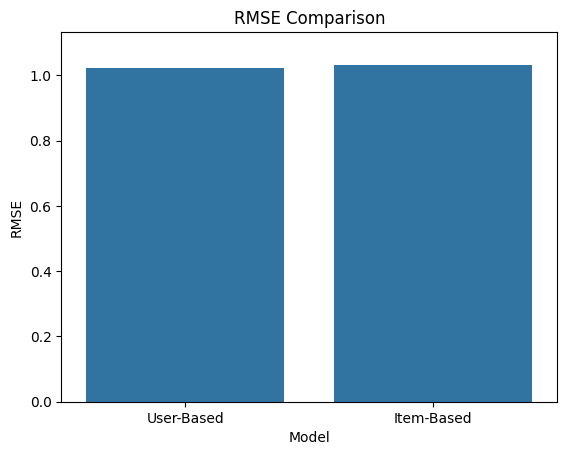

In [17]:
sns.barplot(x="Model", y="RMSE", data=results)
plt.title("RMSE Comparison")
plt.ylim(0, results["RMSE"].max() + 0.1)
plt.show()
